In [1]:
import bolift
import pandas as pd
import numpy as np

/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

# RF baseline

## Experiment outputs

In [37]:
df = pd.read_csv('Data/processed_data.csv')
df.drop(['OD'], axis=1, inplace=True)
df.groupby(['Temperature(C)', 'Doping(%)', 'Time(min)']).count()

Dimension1(nm)  Dimension2(nm)  \
Temperature(C) Doping(%) Time(min)                                   
0              1.00      10                      1               1   
                         60                      1               1   
               3.00      10                      1               1   
                         60                      1               1   
               5.00      10                      1               1   
                         60                      1               1   
               10.00     10                      1               1   
                         60                      1               1   
25             0.25      60                      2               2   
               0.50      60                      5               5   
               0.75      60                      2               2   
               1.00      10                      1               1   
                         60                      6               6   
                         180                     1               1   
               1.25      60                      1               1   
               1.50      60                      1               1   
               1.75      60                      1               1   
               2.00      60                      2               2   
               2.50      60                      1               1   
               3.00      10                      1               1   
                         60                      3               3   
                         180                     1               1   
               5.00      10                      1               1   
                         60                      6               6   
                         180                     1               1   
               10.00     10                      1               1   
                         60                      2               2   
                         180                     1               1   
50             1.00      10                      1               1   
                         60                      1               1   
               3.00      10                      1               1   
                         60                      1               1   
               5.00      10                      1               1   
                         60                      1               1   
               10.00     10                      1               1   
                         60                      1               1   

                                    Dilution(%)  Nano_stock_vol(mL)  \
Temperature(C) Doping(%) Time(min)                                    
0              1.00      10                   1                   1   
                         60                   1                   1   
               3.00      10                   1                   1   
                         60                   1                   1   
               5.00      10                   1                   1   
                         60                   1                   1   
               10.00     10                   1                   1   
                         60                   1                   1   
25             0.25      60                   2                   2   
               0.50      60                   5                   5   
               0.75      60                   2                   2   
               1.00      10                   1                   1   
                         60                   6                   6   
                         180                  1                   1   
               1.25      60                   1                   1   
               1.50      60                   1                   1   
               1.75      60                   1                   1   
               2.00      6

In [29]:
index = df.keys().tolist().index('Experiment')
features = df.keys()[:index]
labels = df.keys()[index+1:-3]
features, labels


(Index(['Dimension1(nm)', 'Dimension2(nm)', 'Dilution(%)', 'Nano_stock_vol(mL)',
        'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)', 'MeOH_vol(mL)',
        'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)', 'Temperature(C)'],
       dtype='object'),
 Index(['Peak1', 'Peak2', 'Area1', 'Area2', 'Distance_peaks', 'ratioP2P1'], dtype='object'))

In [30]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def train_model(train, test):
    model = XGBRegressor(
    eval_metric=mean_absolute_error 
    )

    X_train, y_train = train
    X_test, y_test = test
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)
    
    return model

models = {}
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_df), len(test_df))
for i, k in enumerate(labels):
    # print(k, i, labels[i])
    train = (train_df[features], train_df[labels[i]])
    test = (test_df[features], test_df[labels[i]])
    models[k] = train_model(train, test)
    

44 12
[0]	validation_0-rmse:359.45822	validation_0-mean_absolute_error:359.40994
[1]	validation_0-rmse:253.59147	validation_0-mean_absolute_error:253.52303
[2]	validation_0-rmse:178.79332	validation_0-mean_absolute_error:178.69629
[3]	validation_0-rmse:125.95650	validation_0-mean_absolute_error:125.81873
[4]	validation_0-rmse:88.64777	validation_0-mean_absolute_error:88.45190
[5]	validation_0-rmse:62.32492	validation_0-mean_absolute_error:62.04602
[6]	validation_0-rmse:43.78379	validation_0-mean_absolute_error:43.38586
[7]	validation_0-rmse:30.76829	validation_0-mean_absolute_error:30.19934
[8]	validation_0-rmse:21.69557	validation_0-mean_absolute_error:20.88086
[9]	validation_0-rmse:15.46149	validation_0-mean_absolute_error:15.03817
[10]	validation_0-rmse:11.29879	validation_0-mean_absolute_error:11.16030
[11]	validation_0-rmse:8.66372	validation_0-mean_absolute_error:8.41995
[12]	validation_0-rmse:7.17198	validation_0-mean_absolute_error:6.56632
[13]	validation_0-rmse:6.39296	validat

/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` metho

Peak1 [511.6974] [491.]
Peak2 [635.61743] [656.]
Area1 [0.11976619] [0.10913321]
Area2 [0.6519016] [0.60917254]
Distance_peaks [129.26393] [165.]


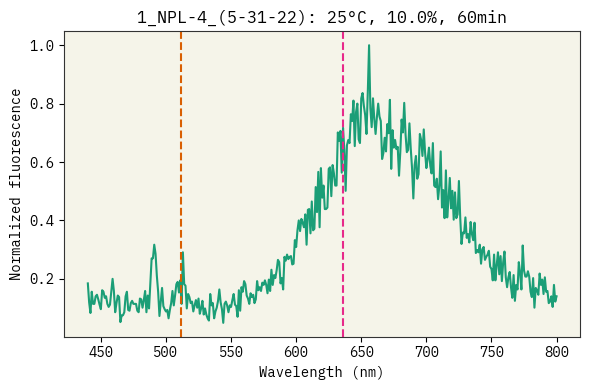

In [98]:
k = 11
sample = test_df.iloc[k:k+1]
feats = sample[features]
labs = sample[labels]

def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

for k in labels:
    # print(k, rmse(models[k].predict(feats), labs[k].values))
    print(k, models[k].predict(feats), labs[k].values)

w = [float(a) for a in sample.iloc[0]['Wavelengths'][1:-1].split(',')]
i = [float(a) for a in sample.iloc[0]['Fluorescence_norm'][1:-1].split(',')]

plt.figure(figsize=(6, 4))
plt.plot(w, i, color="C0")
plt.title(f"{sample.iloc[0]['Experiment']}: {sample.iloc[0]['Temperature(C)']}°C, {sample.iloc[0]['Doping(%)']}%, {sample.iloc[0]['Time(min)']}min")
plt.axvline(x = models['Peak1'].predict(sample[features]), color = 'C1', linestyle = '--')
plt.axvline(x = models['Peak2'].predict(sample[features]), color = 'C3', linestyle = '--')
# change plt figsize
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized fluorescence")
plt.tight_layout()
plt.show()

## Spectra output

In [7]:
df = pd.read_csv('Data/spectra_data.csv')
df.drop(['OD'], axis=1, inplace=True)
df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']).count()

Dimension1(nm)  \
Experiment            Temperature(C) Doping(%) Time(min)                   
1_NPL-4_(5-31-22)     25             1.00      60                    361   
                                     2.50      60                    361   
                                     5.00      60                    361   
                                     10.00     60                    361   
2_NPL-4_(6-1-22)      25             0.25      60                    361   
                                     0.50      60                    361   
                                     0.75      60                    361   
                                     1.00      60                    361   
                                     1.25      60                    361   
                                     1.50      60                    361   
                                     1.75      60                    361   
                                     2.00      60                    361   
                                     3.00      60                    361   
3_NPL-11_(12-26-22)   25             0.50      60                    361   
                                     1.00      60                    361   
                                     2.00      60                    361   
                                     3.00      60                    361   
                                     5.00      60                    361   
4_NPL-17_(5-3-23)     25             0.50      60                    361   
                                     0.75      60                    361   
                                     1.00      60                    361   
                                     5.00      60                    361   
5_NPL-17_(5-22-23)    25             0.25      60                    361   
                                     0.50      60                    361   
                                     1.00      60                    361   
                                     5.00      60                    361   
6_NPL-6_C.L._(7-7-23) 25             0.50      60                    361   
                                     5.00      60                    361   
7_NPL-12_(3-8-23)     0              3.00      10                    361   
                                               60                    361   
                                     10.00     10                    361   
                                               60                    361   
                      25             3.00      10                    361   
                                               60                    361   
                                               180                   361   
                                     10.00     10                    361   
                                               60                    361   
                                               180                   361   
                      50             3.00      10                    361   
                                               60                    361   
                                     10.00     10                    361   
                                               60                    361   
8_NPL-13_(3-8-23)     0              1.00      10                    361   
                                               60                    361   
                                     5.00      10                    361   
                                               60                    361   
                      25             1.00      10                    361   
                                               60                    361   
                                               180                   361   
                                     5.00      10                    361   
                                               60                    361   
                              

In [8]:
index = df.keys().tolist().index('Experiment')
features = list(df.keys()[:index]) + ['Wavelength(nm)']
labels = ['Fluorescence_norm']
features, labels

(['Dimension1(nm)',
  'Dimension2(nm)',
  'Dilution(%)',
  'Nano_stock_vol(mL)',
  'Diluted_vol(mL)',
  'AgConc(M)',
  'AgMass(mg)',
  'MeOH_vol(mL)',
  'H2O_vol(mL)',
  'Doping(%)',
  'AgSol(uL)',
  'Time(min)',
  'Temperature(C)',
  'Wavelength(nm)'],
 ['Fluorescence_norm'])

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

def train_model(train, test):
    model = XGBRegressor(
    eval_metric=mean_absolute_error 
    )
    
    X_train, y_train = train[train.columns.difference(['Fluorescence', 'Fluorescence_norm'])], train['Fluorescence_norm']
    X_test, y_test = test[test.columns.difference(['Fluorescence', 'Fluorescence_norm'])], test['Fluorescence_norm']
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=5)
    
    return model

def test_model(model, validation):
    val_feats = validation[validation.columns.difference(['Fluorescence', 'Fluorescence_norm'])]
    val_labels = validation["Fluorescence_norm"]

    pred = model.predict(val_feats)
    return (pred, val_labels.to_numpy(), val_feats['Wavelength(nm)'].to_numpy())

In [ ]:
one_out = []
i=0
for group, validation in df.groupby(['Experiment', 'Temperature(C)', 'Doping(%)', 'Time(min)']):
    data = df.copy()
    exp, T, d, t = group
    validation = validation[features + labels]

    # validation = data.query(
    #     f'`Temperature(C)` == {T} & `Doping(%)` == {d} & `Time` == {t}'
    # )
    train_df = data.drop(validation.index)
    train, test = train_test_split(train_df[features + labels], test_size=0.2, random_state=42)

    model = train_model(train, test)

    prediction = test_model(model, validation)
    one_out.append((group, prediction))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


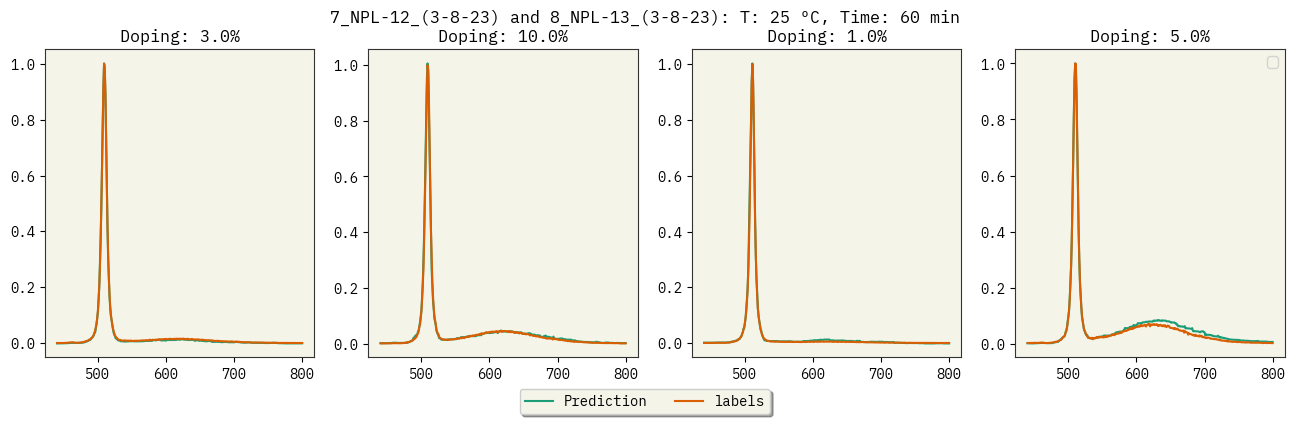

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
i=0
for group, predictions in one_out:
    axs = axs.flatten()
    exp, T, d, t = group
    if exp not in ["8_NPL-13_(3-8-23)", "7_NPL-12_(3-8-23)"] or T != 0.0 or t != 60:
        continue
    # title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
    title = f"Doping: {d}%"

    if i == 0:
        axs[i].plot(predictions[2], predictions[0], color="C0", label='Prediction')
        axs[i].plot(predictions[2], predictions[1], color="C1", label='labels')
    else:
        axs[i].plot(predictions[2], predictions[0], color="C0")
        axs[i].plot(predictions[2], predictions[1], color="C1")
    axs[i].set_title(title)

    i+=1 
    plt.savefig(f'preds/{group}.png')
fig.legend(loc='center', bbox_to_anchor=(0.5,0), fancybox=True, shadow=True, ncol=2)
fig.suptitle(f"7_NPL-12_(3-8-23) and 8_NPL-13_(3-8-23): T: 25 ºC, Time: 60 min")
plt.legend()
plt.show()


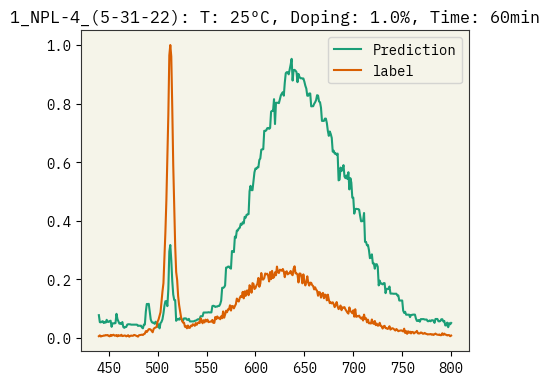

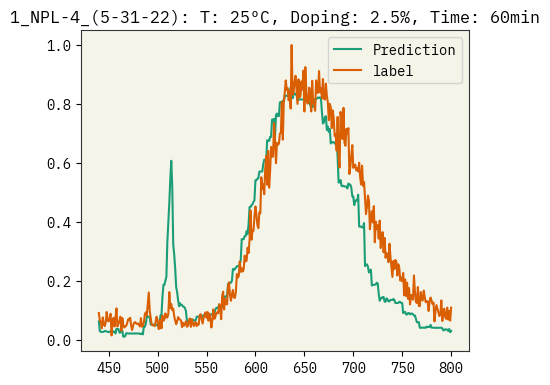

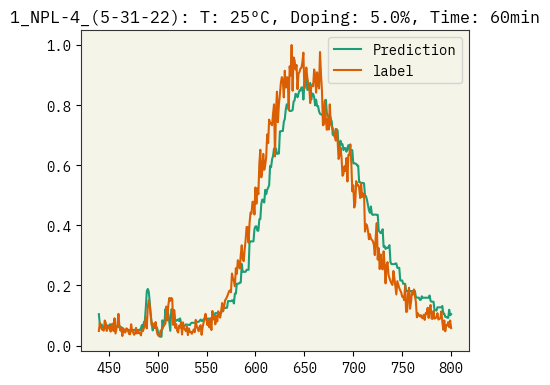

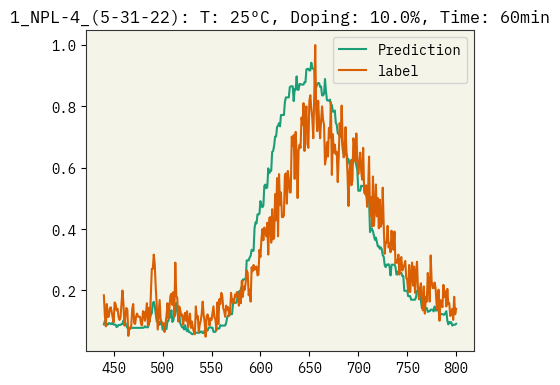

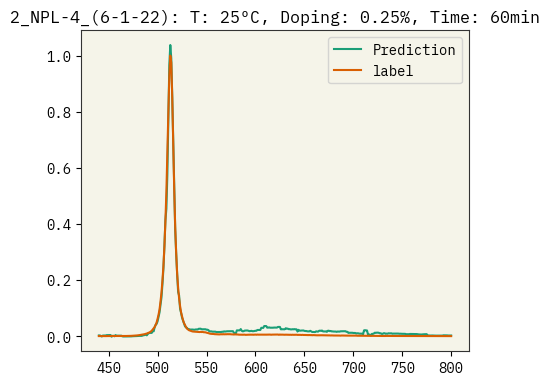

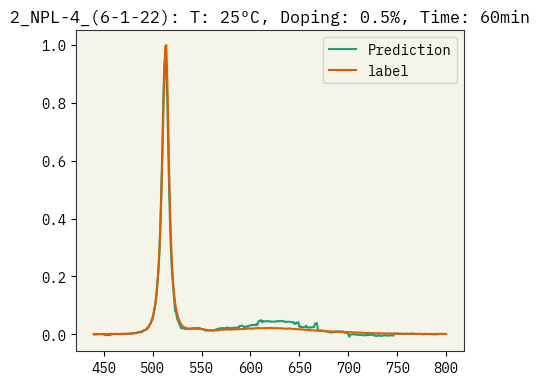

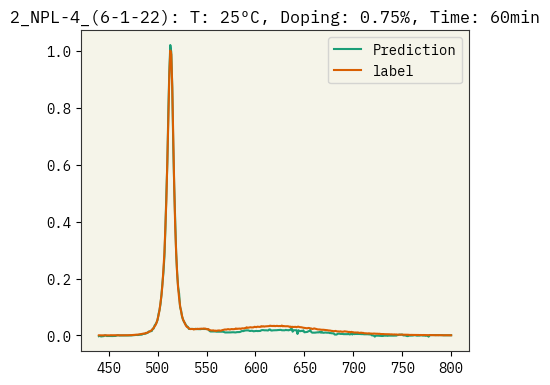

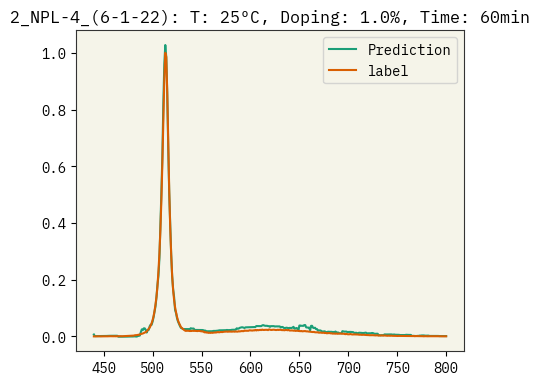

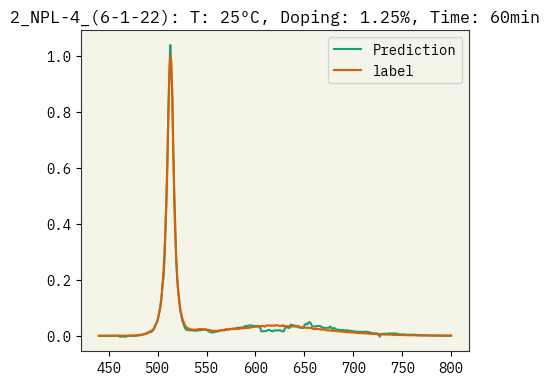

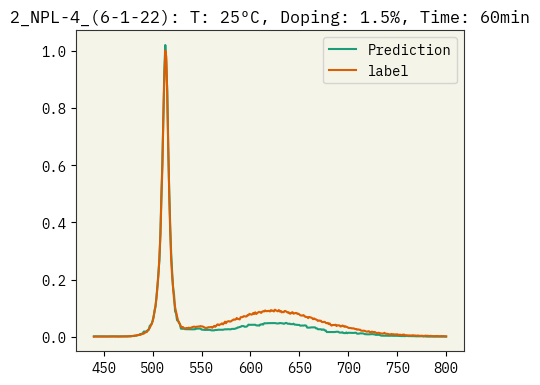

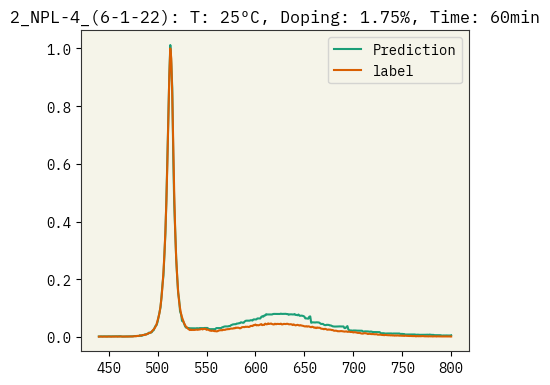

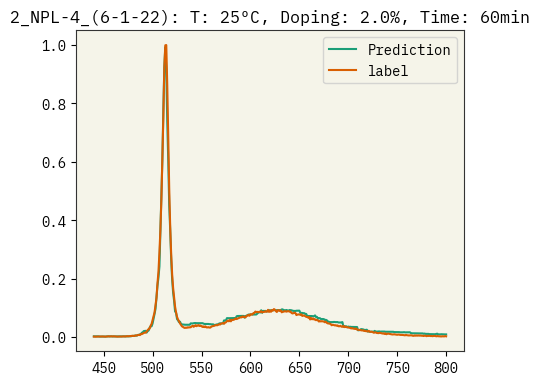

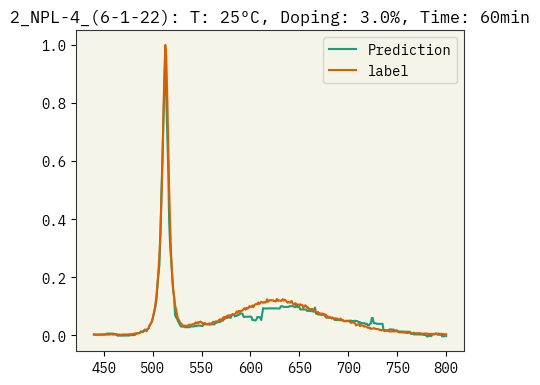

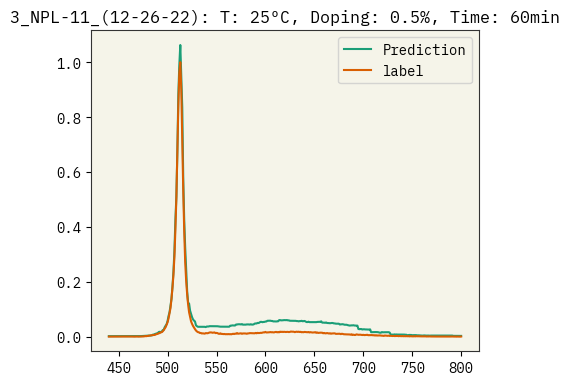

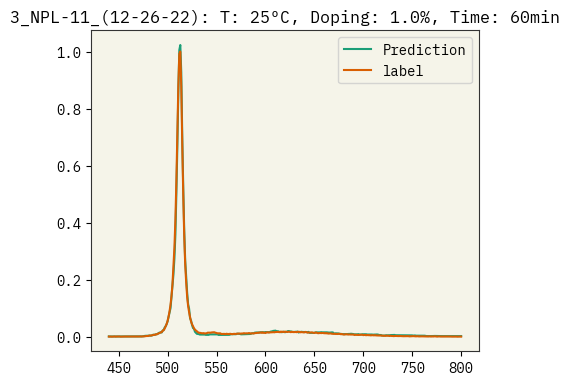

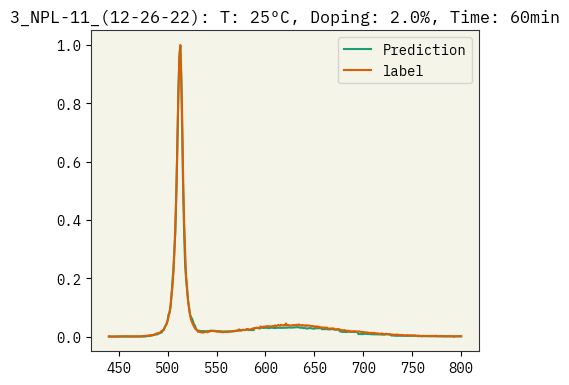

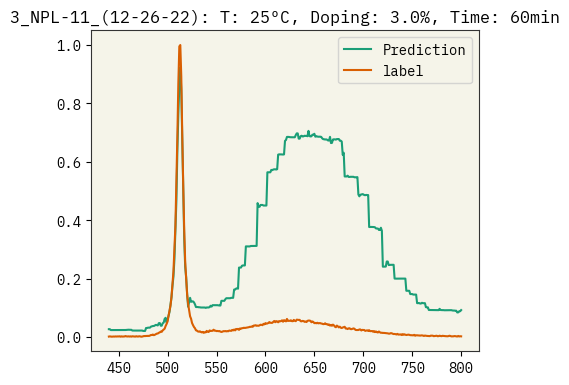

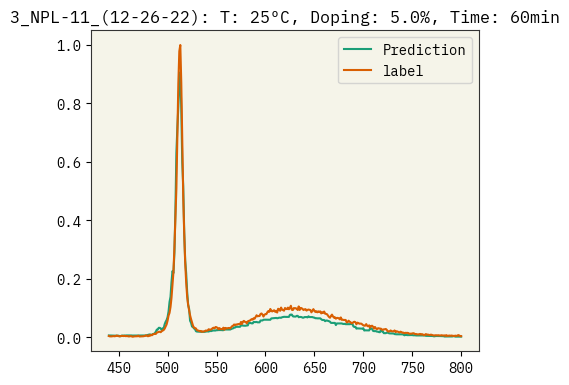

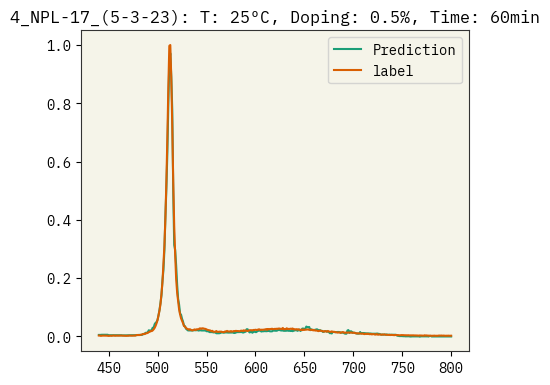

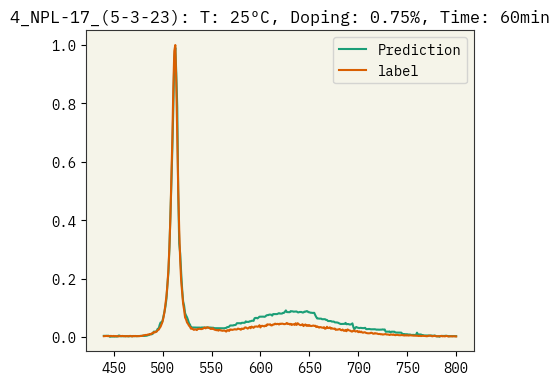

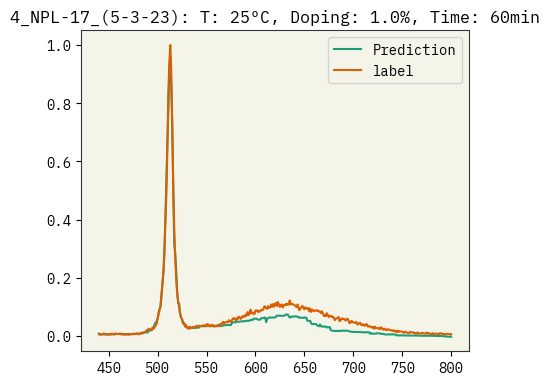

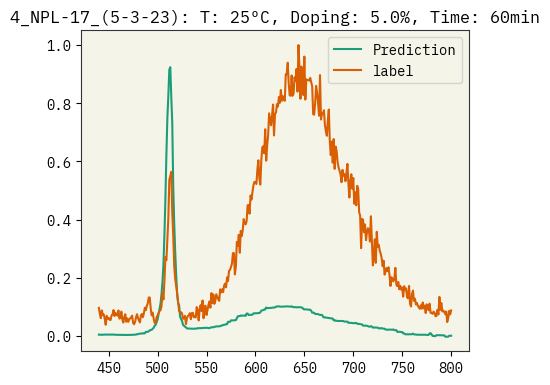

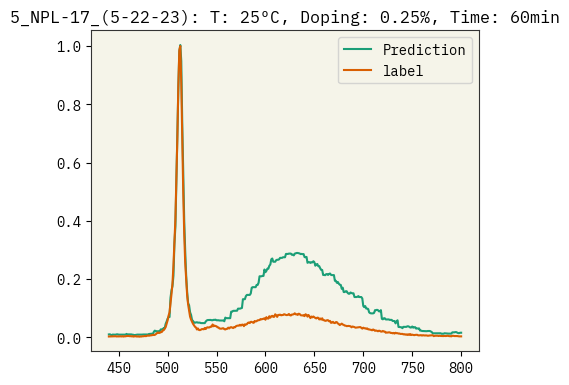

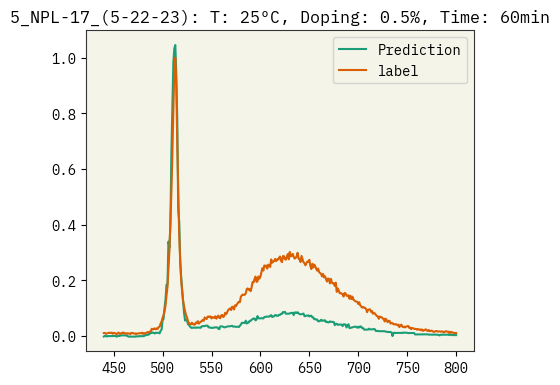

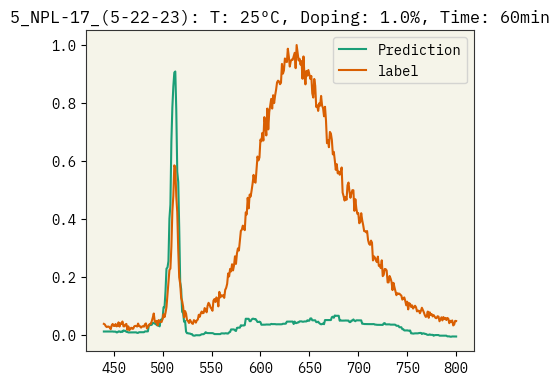

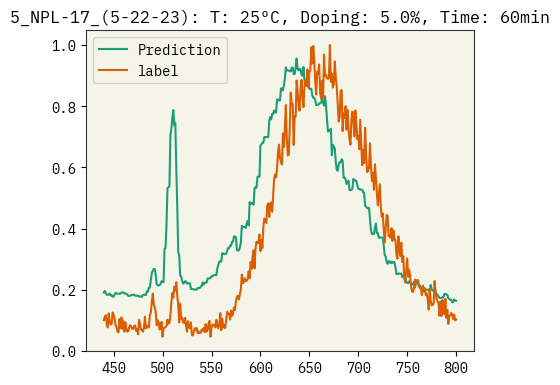

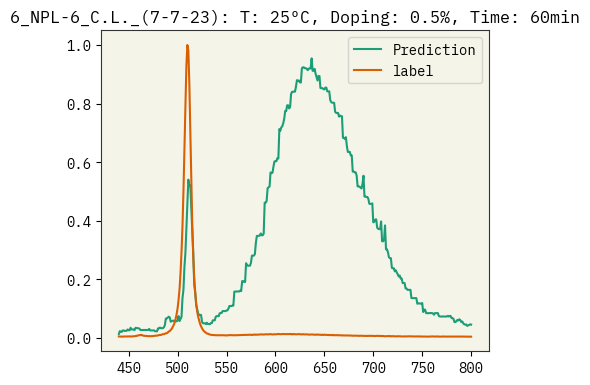

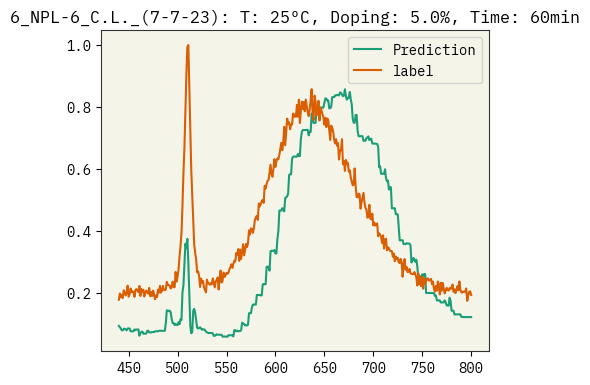

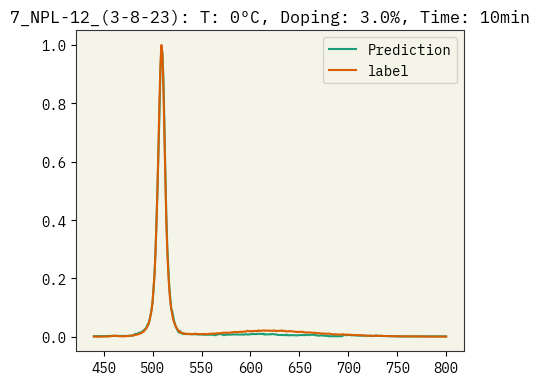

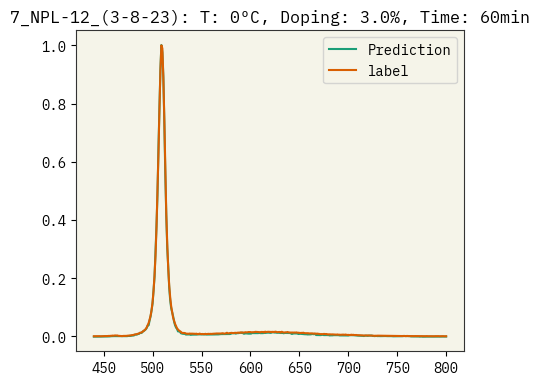

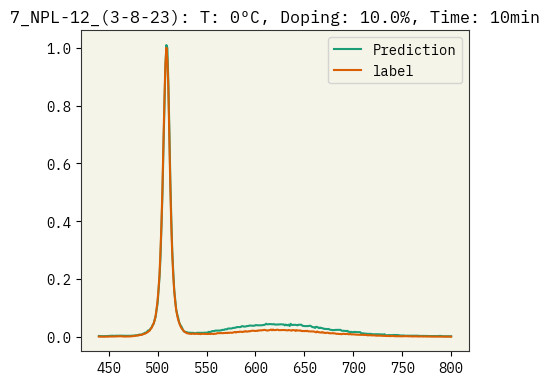

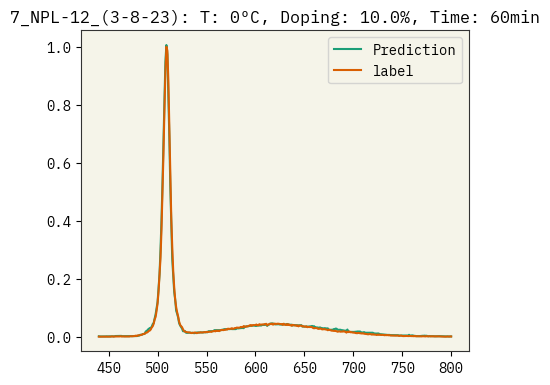

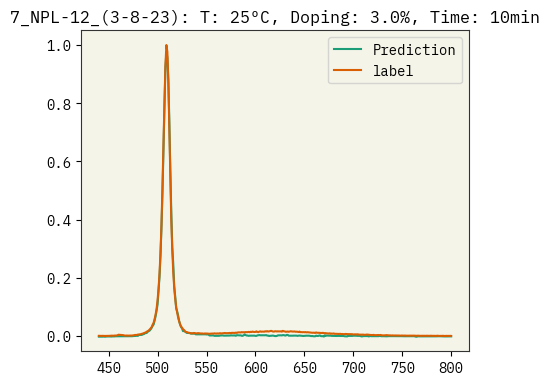

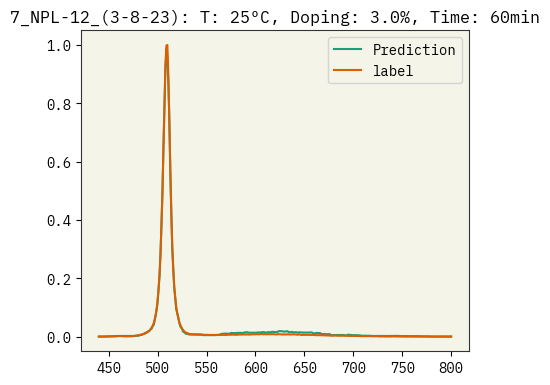

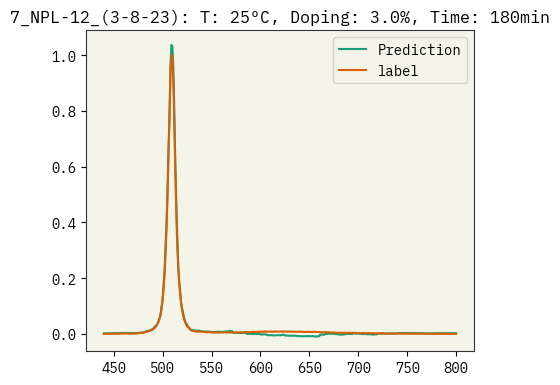

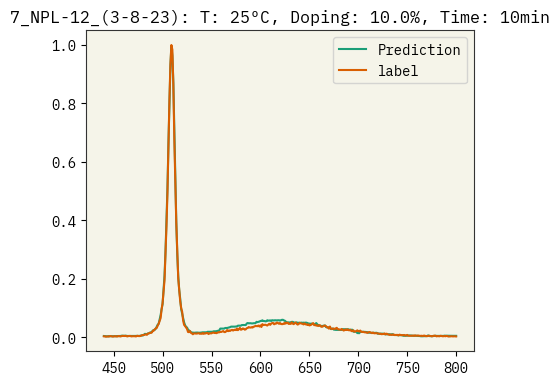

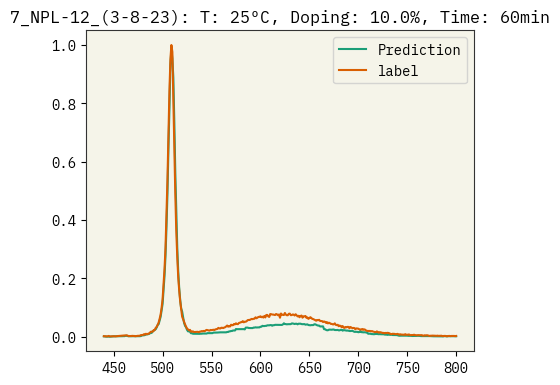

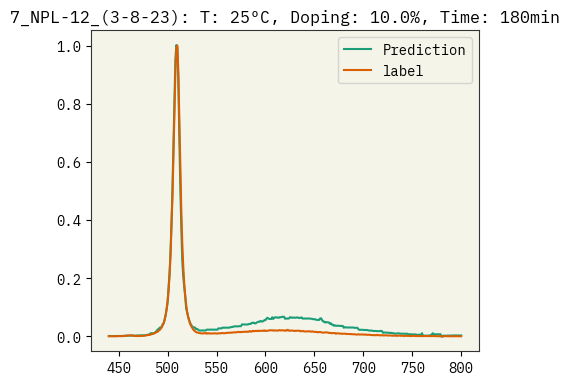

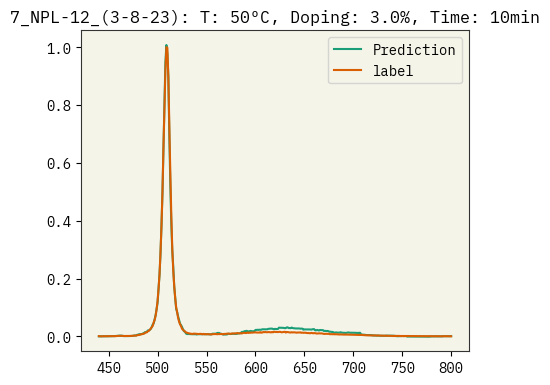

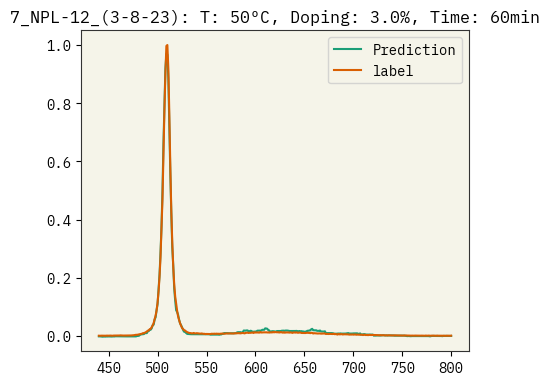

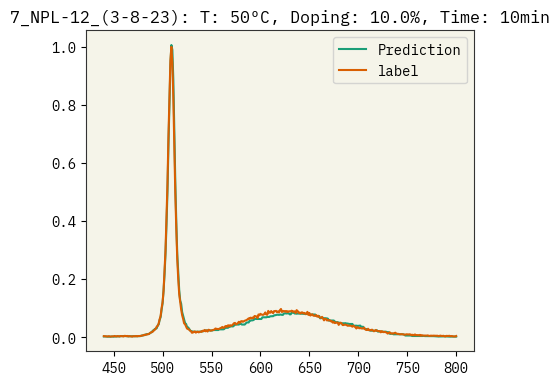

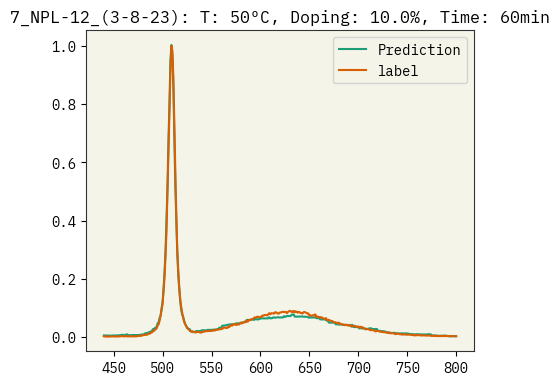

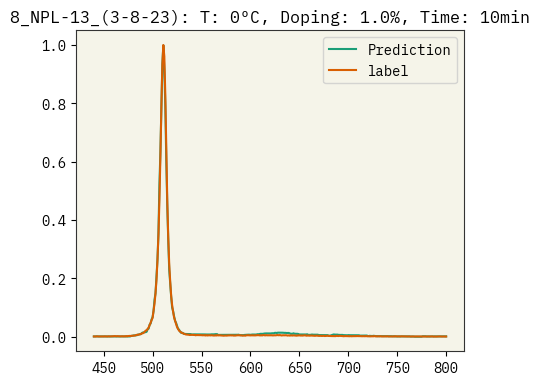

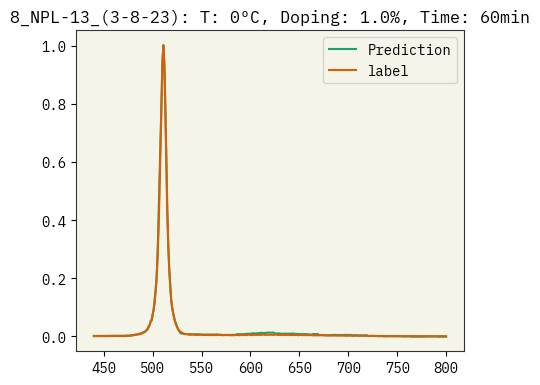

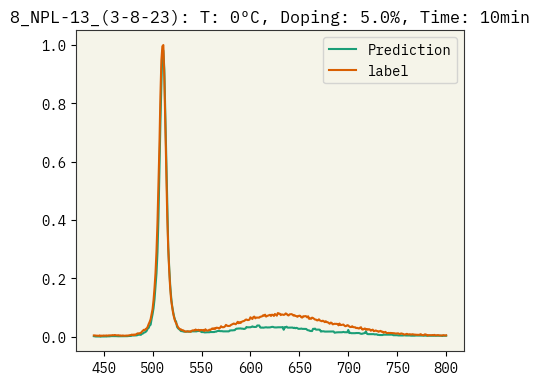

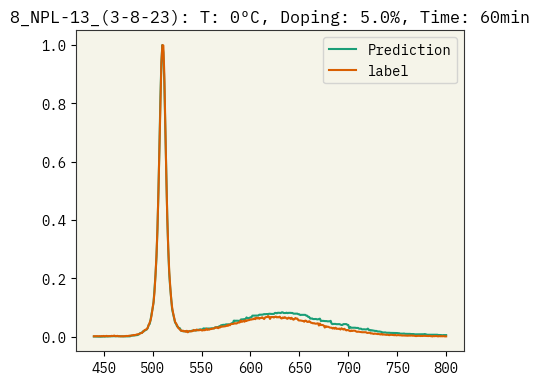

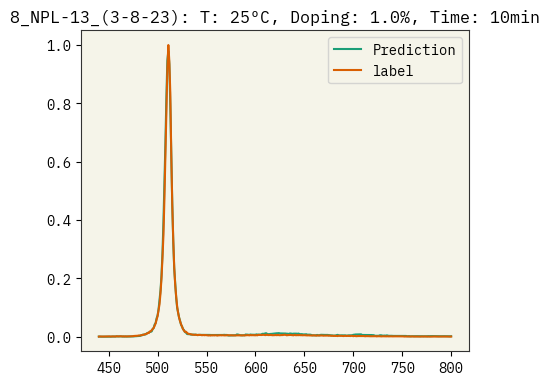

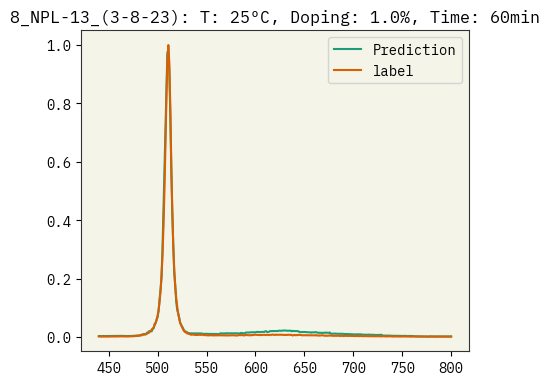

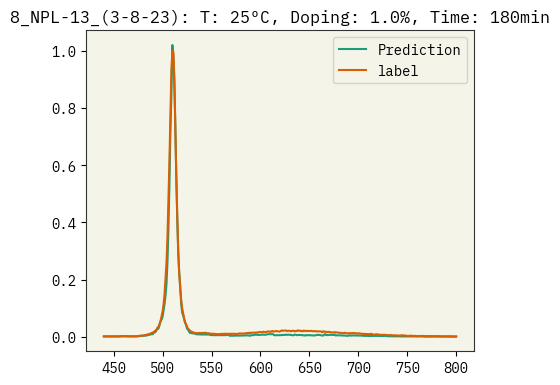

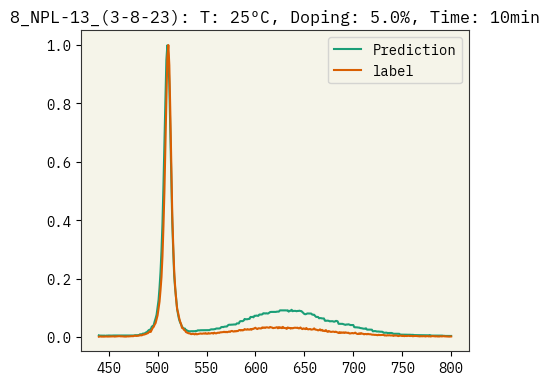

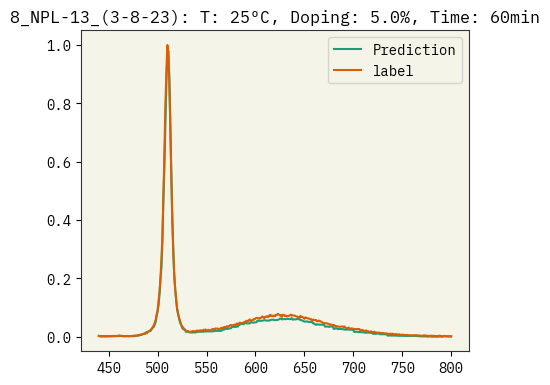

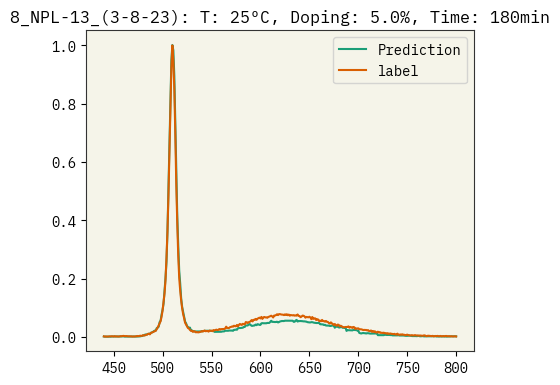

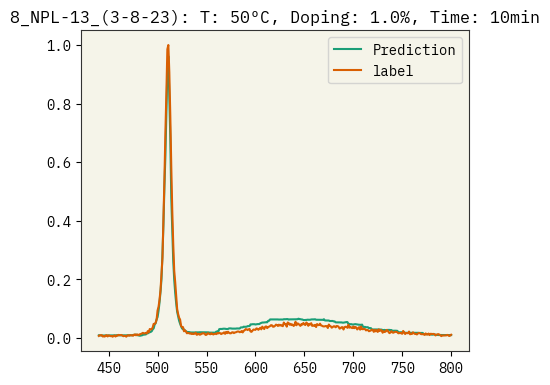

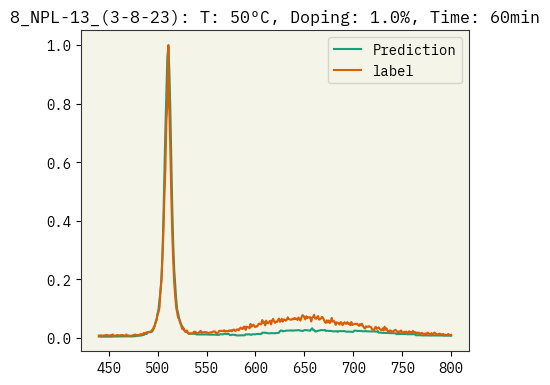

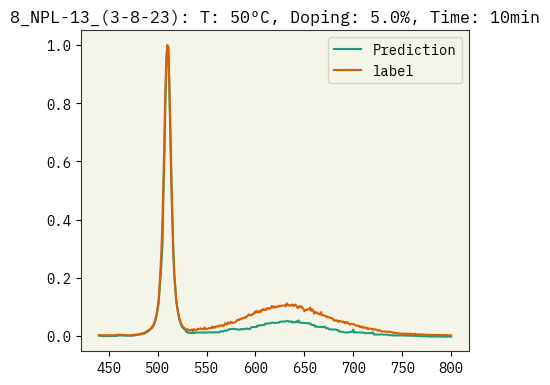

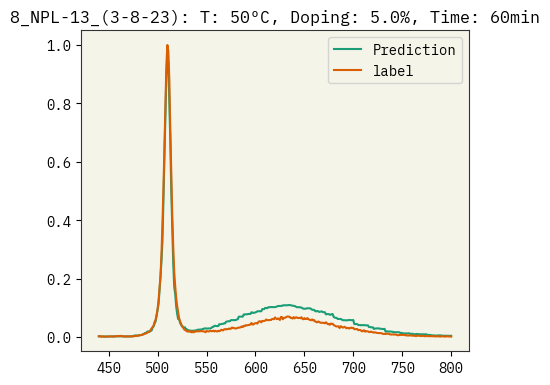

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(
    {
        "figure.figsize": (5.0, 5.0 / 1.2),
    }
)

for group, predictions in one_out:
    exp, T, d, t = group
    title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
    plt.figure()
    sns.lineplot(x=predictions[2], y=predictions[0], label='Prediction').set(title=title)
    sns.lineplot(x=predictions[2], y=predictions[1], label='label')
    plt.legend()
    plt.savefig(f'preds/{group}.png')
    fig.legend(loc='center', bbox_to_anchor=(0.5,0), fancybox=True, shadow=True, ncol=2)
    plt.show()



### Evaluate predictions

In [21]:
import numpy as np 

def _get_peaks(x, y):
    peaks = []
    th = 0.001
    for i in range(1, len(x)-1):
        if y[i] > y[i-1]+th and y[i] > y[i+1]+th:
            peaks.append((x[i], y[i]))
    return peaks

def get_peaks(x, y):
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 700)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return x1[np.argmax(y1)], x2[np.argmax(y2)]

def get_area_under_peaks(x, y, norm=None):
    if not norm:
        return np.trapz(y, x)
    
    x = np.array(x)
    p1_i = np.where(x == 450)[0][0]
    p1_e = np.where(x == 550)[0][0]
    p2_i = np.where(x == 550)[0][0]
    p2_e = np.where(x == 700)[0][0]

    x1 = x[p1_i:p1_e]
    y1 = y[p1_i:p1_e]
    x2 = x[p2_i:p2_e]
    y2 = y[p2_i:p2_e]

    return np.trapz(y1, x1)/norm, np.trapz(y2, x2)/norm

def process_spectrum(x, y, norm_area):
    peaks = get_peaks(x, y)
    areas = get_area_under_peaks(x, y, norm_area)
    return peaks, areas

In [34]:
def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

pred_dict = {
    "Peak1": [],
    "Peak2": [],
    "Area1": [],
    "Area2": [],
    "Distance_peaks": []
}
label_dict = {
    "Peak1": [],
    "Peak2": [],
    "Area1": [],
    "Area2": [],
    "Distance_peaks": []
}

for group, predictions in one_out:
    pred_peak = get_peaks(predictions[2], predictions[0])
    pred_norm_area = get_area_under_peaks(predictions[2], predictions[0])
    pred_area = get_area_under_peaks(predictions[2], predictions[0], norm=pred_norm_area)

    label_peak = get_peaks(predictions[2], predictions[1])
    label_norm_area = get_area_under_peaks(predictions[2], predictions[1])
    label_area = get_area_under_peaks(predictions[2], predictions[1], norm=label_norm_area)
    
    pred_dict["Peak1"].append(pred_peak[0])
    pred_dict["Peak2"].append(pred_peak[1])
    pred_dict["Area1"].append(pred_area[0])
    pred_dict["Area2"].append(pred_area[1])
    pred_dict["Distance_peaks"].append(pred_peak[1] - pred_peak[0])

    label_dict["Peak1"].append(label_peak[0])
    label_dict["Peak2"].append(label_peak[1])
    label_dict["Area1"].append(label_area[0])
    label_dict["Area2"].append(label_area[1])
    label_dict["Distance_peaks"].append(label_peak[1] - label_peak[0])
    
    #plot
    # exp, T, d, t = group
    # title = f"{exp}: T: {T}ºC, Doping: {d}%, Time: {t}min"
    # plt.figure()
    # sns.lineplot(x=predictions[2], y=predictions[0], label='Prediction').set(title=title)
    # sns.lineplot(x=predictions[2], y=predictions[1], label='label')
    # plt.legend()
    # plt.show()    

for k in pred_dict.keys():
    print(k, rmse(np.array(pred_dict[k]), np.array(label_dict[k])))

Peak1 3.0148442272007543
Peak2 18.94163969369374
Area1 0.18820047650888208
Area2 0.15884234578037656
Distance_peaks 19.343234328460024


# bolift

In [72]:
import os
import cloudpickle
import bolift
import seaborn as sns
from dotenv import load_dotenv
load_dotenv()

True

In [73]:
df = pd.read_csv('Data/processed_data.csv')
df.drop(['OD'], axis=1, inplace=True)
df.groupby(['Temperature(C)', 'Doping(%)', 'Time(min)']).count()

Dimension1(nm)  Dimension2(nm)  \
Temperature(C) Doping(%) Time(min)                                   
0              1.00      10                      1               1   
                         60                      1               1   
               3.00      10                      1               1   
                         60                      1               1   
               5.00      10                      1               1   
                         60                      1               1   
               10.00     10                      1               1   
                         60                      1               1   
25             0.25      60                      2               2   
               0.50      60                      5               5   
               0.75      60                      2               2   
               1.00      10                      1               1   
                         60                      6               6   
                         180                     1               1   
               1.25      60                      1               1   
               1.50      60                      1               1   
               1.75      60                      1               1   
               2.00      60                      2               2   
               2.50      60                      1               1   
               3.00      10                      1               1   
                         60                      3               3   
                         180                     1               1   
               5.00      10                      1               1   
                         60                      6               6   
                         180                     1               1   
               10.00     10                      1               1   
                         60                      2               2   
                         180                     1               1   
50             1.00      10                      1               1   
                         60                      1               1   
               3.00      10                      1               1   
                         60                      1               1   
               5.00      10                      1               1   
                         60                      1               1   
               10.00     10                      1               1   
                         60                      1               1   

                                    Dilution(%)  Nano_stock_vol(mL)  \
Temperature(C) Doping(%) Time(min)                                    
0              1.00      10                   1                   1   
                         60                   1                   1   
               3.00      10                   1                   1   
                         60                   1                   1   
               5.00      10                   1                   1   
                         60                   1                   1   
               10.00     10                   1                   1   
                         60                   1                   1   
25             0.25      60                   2                   2   
               0.50      60                   5                   5   
               0.75      60                   2                   2   
               1.00      10                   1                   1   
                         60                   6                   6   
                         180                  1                   1   
               1.25      60                   1                   1   
               1.50      60                   1                   1   
               1.75      60                   1                   1   
               2.00      6

In [74]:
df[['Peak1', "Peak2", "Area1", "Area2", "ratioP2P1"]].describe()

Peak1       Peak2         Area1          Area2  ratioP2P1
count   56.000000   56.000000  5.600000e+01      56.000000  56.000000
mean   510.982143  624.964286  7.803343e+05  257179.276786   1.559201
std      3.205059   16.252512  8.096359e+05  144278.747123   3.042757
min    491.000000  550.000000  4.855500e+03   27103.000000   0.061448
25%    510.000000  618.000000  3.049756e+05  143051.500000   0.208425
50%    511.000000  625.500000  5.588022e+05  239792.500000   0.473172
75%    513.000000  630.500000  1.059979e+06  358510.125000   0.871267
max    514.000000  671.000000  4.619610e+06  525529.000000  13.367074

In [75]:
index = df.keys().tolist().index('Experiment')
features = df.keys()[:index]
labels = df.keys()[index+1:-3]
features, labels

(Index(['Dimension1(nm)', 'Dimension2(nm)', 'Dilution(%)', 'Nano_stock_vol(mL)',
        'Diluted_vol(mL)', 'AgConc(M)', 'AgMass(mg)', 'MeOH_vol(mL)',
        'H2O_vol(mL)', 'Doping(%)', 'AgSol(uL)', 'Time(min)', 'Temperature(C)'],
       dtype='object'),
 Index(['Peak1', 'Peak2', 'Area1', 'Area2', 'Distance_peaks', 'ratioP2P1'], dtype='object'))

In [76]:
prompt_template = "Stock nanoplatelets have dimensions {Dimension1(nm)} nm by {Dimension2(nm)} nm and the optical density of 100x hexanes dilution of stock is {Dilution(%)} %" \
                    "recorded at 512nm. {Nano_stock_vol(mL)} mL nanoplatelets stock is diluted 7x by hexanes using {Diluted_vol(mL)} mL for each trial of doping. " \
                    "Silver acetate solution of {AgConc(M)} M is made with {AgMass(mg)} mg of silver acetate in {MeOH_vol(mL)} mL of MeOH and {H2O_vol(mL)} mL of water. " \
                    "{Doping(%)} % Ag doping requires {AgSol(uL)} uL of silver doping solution, respectively. " \
                    "The reaction was performed at 1000 rpm for {Time(min)} minutes at {Temperature(C)} oC. " \
                    "Fluorescence of each doped sample was collected as a 30x dilution with hexanes."

s = df[features].iloc[0].to_dict()
prompt_template.format(**s)
prompts = []
labels_auc1 = []
labels_auc2 = []
for i, r in df.iterrows():
    s = r[features].to_dict()
    prompts.append(prompt_template.format(**s))
    # labels.append(r['Peak1'])
    # labels.append(r['Peak2'])
    labels_auc1.append(r['Area1'])
    labels_auc2.append(r['Area2'])
    # labels.append(r['Distance_peaks'])
    # labels.append(r['ratioP2P1'])

examples = [f"{p}\t{a1}\t{a2}" for p, a1, a2 in zip(prompts, labels_auc1, labels_auc2)]

with open('Data/procedures.tsv', 'w') as f:
    f.write(f"prompt\tauc1\tauc2\n")
    f.write('\n'.join(examples))

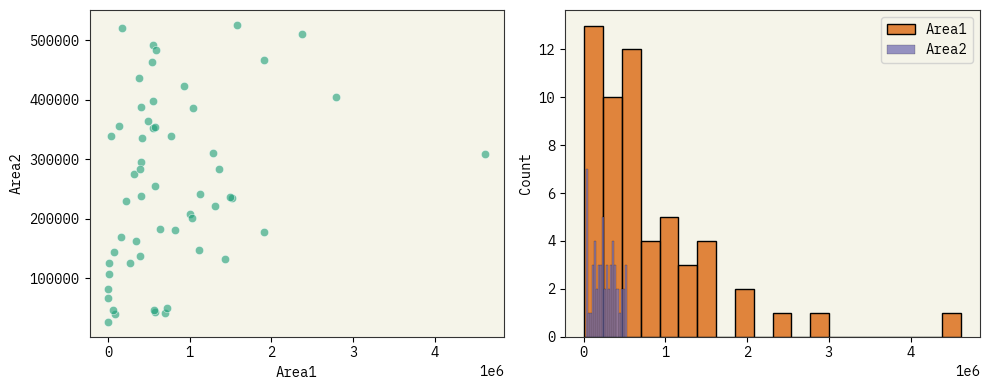

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.scatter(labels_auc1, labels_auc2, alpha=0.6, color='C0', edgecolors='w', linewidth=0.5)
ax1.set_xlabel('Area1')
ax1.set_ylabel('Area2')

sns.histplot(labels_auc1, bins=20, label='Area1', ax=ax2, color='C1')
sns.histplot(labels_auc2, bins=20, label='Area2', ax=ax2, color='C2')
ax2.legend()

plt.tight_layout()
plt.show()


In [78]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"


# Sample spectra data for each point in the scatter plot
# Replace with your actual spectra data
spectra_data = [np.sin(np.linspace(0, 20, 100) + i) for i in df['Area1']]

# Create main scatter plot
scatter = go.Scatter(x=df['Area1'], y=df['Area2'], mode='markers', name='FL')

# Placeholder for the spectra subplot
spectra = go.Scatter(y=spectra_data[0], visible=True, name='Spectra')

# Create a figure with subplots: main scatter and spectra subplot
fig = go.Figure(data=[scatter, spectra],
                # layout=go.Layout(
                #     title="Scatter plot with spectra on hover",
                #     updatemenus=[dict(type='buttons', showactive=False)])
                )
fig.update_traces(hoverinfo="none", hovertemplate=None)

# Define the hover function
def update_point(trace, points, selector):
    if points.point_inds:
        idx = points.point_inds[0]
        spectra_trace = fig.data[1]
        spectra_trace.y = spectra_data[idx]
        spectra_trace.visible = True
        fig.update_layout(title=f"Showing spectra for point {idx}")


# Bind the hover function to the scatter plot
scatter.on_hover(update_point)

# Display the figure
fig.show()


In [81]:
import dash
from dash.exceptions import PreventUpdate
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# Create dash app
app = dash.Dash(__name__)

def plot_and_encode_image(data):
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(data)
    plt.close(fig)
    
    # Convert plot to PNG image
    buf = BytesIO()
    fig.savefig(buf, format="png")
    
    # Encode PNG image to base64 string
    data = base64.b64encode(buf.getbuffer()).decode("utf8")
    return "data:image/png;base64,{}".format(data)


# Create scatter plot with x and y coordinates
fig = px.scatter(df, x="Area1", y="Area2",custom_data=["Wavelengths", "Fluorescence"])

# Update layout and update traces
fig.update_layout(clickmode='event+select')
fig.update_traces(marker_size=10)

# Create app layout to show dash graph
app.layout = html.Div(
   [
      dcc.Graph(
         id="graph_interaction",
         figure=fig,
      ),
      html.Img(id='image', src='')
   ]
)

@app.callback(
    Output('image', 'src'),
    Input('graph_interaction', 'hoverData'))
def update_image(hoverData):
    if hoverData:
        data_to_plot = hoverData["points"][0]["customdata"][0]
        return plot_and_encode_image(data_to_plot)
    else:
        raise PreventUpdate

if __name__ == '__main__':
   app.run_server(debug=True)

In [64]:
import numpy as np
indexes = np.arange(len(prompts))
np.random.shuffle(indexes)
split = (len(indexes)-12)/len(indexes)

train_indexes = indexes[:int(split*len(indexes))]
test_indexes = indexes[int(split*len(indexes)):]

In [65]:
asktell = bolift.AskTellFewShotTopk(
    prefix="Complete the distance between the fluorescence peaks in the spectra measured for the last experiment."\
          " Each answer should be numeric and ends with ###." \
          " Use the following information to complete the prompt: \n",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    # y_name="position of first fluorescence peak",
    # y_name="position of second fluorescence peak",
    # y_name="area under first fluorescence peaks",
    # y_name="area under second fluorescence peaks",
    # y_name="distance between fluorescence peaks",
    y_name="ratio between area under the two fluorescence peaks",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-4",
    selector_k=5,
    temperature=0.7
)

for i in train_indexes:
  asktell.tell(prompts[i], labels[i])

In [66]:
yhat=[]
y=[]
for i in test_indexes:
  yhat.append(asktell.predict(prompts[i]))
  y.append(labels[i])

In [67]:
for i in test_indexes:
  print(f"{prompts[i]} => {labels[i]}")

[f"{i.mean():.2f}" for i in yhat], y

Stock nanoplatelets have dimensions 18.8 nm by 14.04 nm and the optical density of 100x hexanes dilution of stock is 0.175 %recorded at 512nm. 0.25 mL nanoplatelets stock is diluted 7x by hexanes using 1.75 mL for each trial of doping. Silver acetate solution of 0.0007 M is made with 3.5 mg of silver acetate in 20 mL of MeOH and 8 mL of water. 1.75 % Ag doping requires 21.0 uL of silver doping solution, respectively. The reaction was performed at 1000 rpm for 60 minutes at 25 oC. Fluorescence of each doped sample was collected as a 30x dilution with hexanes. => 1.1949317738791423
Stock nanoplatelets have dimensions 31.63 nm by 13.8 nm and the optical density of 100x hexanes dilution of stock is 0.12 %recorded at 512nm. 0.5 mL nanoplatelets stock is diluted 7x by hexanes using 3.5 mL for each trial of doping. Silver acetate solution of 0.006 M is made with 14.0 mg of silver acetate in 10 mL of MeOH and 4 mL of water. 1.0 % Ag doping requires 3.0 uL of silver doping solution, respectivel

(['1.29',
  '1.22',
  '1.23',
  '1.27',
  '1.19',
  '1.23',
  '1.25',
  '1.23',
  '1.32',
  '1.19',
  '1.22',
  '1.21'],
 [1.1949317738791423,
  1.244140625,
  1.2241715399610136,
  1.2465753424657535,
  1.1901960784313723,
  1.2140077821011672,
  1.237721021611002,
  1.2222222222222223,
  1.336048879837067,
  1.2475633528265109,
  1.227450980392157,
  1.2280701754385963])

In [68]:
def rmse(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.mean((a - b)**2))

sum = 0
print(f"| {'predicted':^23s} | {'label':^10s} | {'AE':^10s} | ")
n = 0
for ihat, i in zip(yhat, y):
  n+=1
  mae = abs(ihat.mean()-i)
  print(f"| {ihat.mean():^10.2f}+/-{ihat.std():^10.2f} | {i:^10.2f} | {mae:^10.2f} |")
  sum += mae
print(f"\n{'RMSE: ':>20s}{rmse([ihat.mean() for ihat in yhat], y):<18.2f}")

|        predicted        |   label    |     AE     | 
|    1.29   +/-   0.02    |    1.19    |    0.09    |
|    1.22   +/-   0.00    |    1.24    |    0.02    |
|    1.23   +/-   0.03    |    1.22    |    0.01    |
|    1.27   +/-   0.00    |    1.25    |    0.03    |
|    1.19   +/-   0.01    |    1.19    |    0.00    |
|    1.23   +/-   0.03    |    1.21    |    0.02    |
|    1.25   +/-   0.01    |    1.24    |    0.01    |
|    1.23   +/-   0.03    |    1.22    |    0.01    |
|    1.32   +/-   0.03    |    1.34    |    0.02    |
|    1.19   +/-   0.02    |    1.25    |    0.06    |
|    1.22   +/-   0.00    |    1.23    |    0.01    |
|    1.21   +/-   0.04    |    1.23    |    0.01    |

              RMSE: 0.03              


In [69]:
asktell = bolift.AskTellFewShotTopk(
    prefix="Complete the distance between the fluorescence peaks in the spectra measured for the last experiment."\
          " Each answer should be numeric and ends with ###." \
          " Use the following information to complete the prompt: \n",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    # y_name="position of first fluorescence peak",
    # y_name="position of second fluorescence peak",
    # y_name="area under first fluorescence peaks",
    # y_name="area under second fluorescence peaks",
    # y_name="distance between fluorescence peaks",
    y_name="ratio between area under the two fluorescence peaks",
    y_formatter=lambda y: f"{y:.2f}",
    model="text-davinci-003",
    selector_k=5,
    temperature=0.7
)

for p,l in zip(prompts, labels):
  asktell.tell(p, float(l))

In [70]:
pool = cloudpickle.load(open('Data/pool.pkl', 'rb'))
asktell.ask(pool, aq_fxn="expected_improvement", k=5, inv_filter=14, aug_random_filter=2)

(['Stock nanoplatelets have dimensions 39.16 nm by 6.34 nm and the optical density of 100x hexanes dilution of stock is 0.42 %recorded at 512nm. 0.5 mL nanoplatelets stock is diluted 7x by hexanes using 3.5 mL for each trial of doping. Silver acetate solution of 0.0007 M is made with 3.5 mg of silver acetate in 20 mL of MeOH and 8 mL of water. 1.25 % Ag doping requires 15.0 uL of silver doping solution, respectively. The reaction was performed at 1000 rpm for 60 minutes at 50 oC. Fluorescence of each doped sample was collected as a 30x dilution with hexanes.',
  'Stock nanoplatelets have dimensions 18.8 nm by 14.04 nm and the optical density of 100x hexanes dilution of stock is 0.212 %recorded at 512nm. 0.5 mL nanoplatelets stock is diluted 7x by hexanes using 3.5 mL for each trial of doping. Silver acetate solution of 0.006 M is made with 14.0 mg of silver acetate in 10 mL of MeOH and 4 mL of water. 1.0 % Ag doping requires 3.0 uL of silver doping solution, respectively. The reaction 